In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [41]:
df = pd.read_csv('../data/nome.csv', sep=',', index_col=0)
df.head(5)

,name,order_id,customer_id,int_itens_comp
265373,Lombo Suino Fresco Fat Bd Kg,9991,7927,3203
79454,Feijao Pedretti Ouro Tp 1 1kg,5434,7927,2350
79453,Molho Tom Fugini Sc 340g,5434,7927,3624
79452,Arroz Rosalito Ext Premium Tp1 2kg,5434,7927,441
79451,Qjo Muss Aurora Pd Kg,5434,7927,4447


In [42]:
# quantidade de ítens comprados por cliente
grup = df.groupby(by='customer_id').name.value_counts()
#grup.to_csv('../data/Itensbyclient.csv')
    grup

customer_id  name                              
7927         Acucar Ref Uniao 1kg                  11
             Iog Vigor Grego 100g                  10
             Lava Roupa Po Omo Lav Perf Cx 800g     8
             Oleo Soja Liza Pet 900ml               8
             Refrig Antarc Soda 600ml               8
                                                   ..
61661        Lava Roupa Po Tixan Cx 1kg             2
             Pano Limppano Furatto C/5              2
             Silic Auto Monza 100ml                 2
             Marg Qualy Cremosa 500g                1
             Odoriz Amb Glade Aero 360ml            1
Name: name, Length: 138977, dtype: int64

In [43]:
# os 10 ítens mais vendidos
mais_vendidos = df['name'].value_counts()[:10]
mais_vendidos

Refresco Tang 25g               5392
Lava Louca Liq Ype 500ml        5129
Refresco Sukest 30g Faz 1l      4410
Molho Tom Predilecta Sc 340g    2822
Tomate Pizzadoro Kg             2745
Cebola Kg                       2711
Batata Kg                       2639
Leite Lv Jussara 1l             2248
Mac Basilar Semolado 500g       2195
Pao Frances Kg                  2091
Name: name, dtype: int64

In [44]:
# nomes dos produtos mais pedidos
prods = [s.strip() for s in mais_vendidos.index.tolist()]
prods

['Refresco Tang 25g',
 'Lava Louca Liq Ype 500ml',
 'Refresco Sukest 30g Faz 1l',
 'Molho Tom Predilecta Sc 340g',
 'Tomate Pizzadoro Kg',
 'Cebola Kg',
 'Batata Kg',
 'Leite Lv Jussara 1l',
 'Mac Basilar Semolado 500g',
 'Pao Frances Kg']

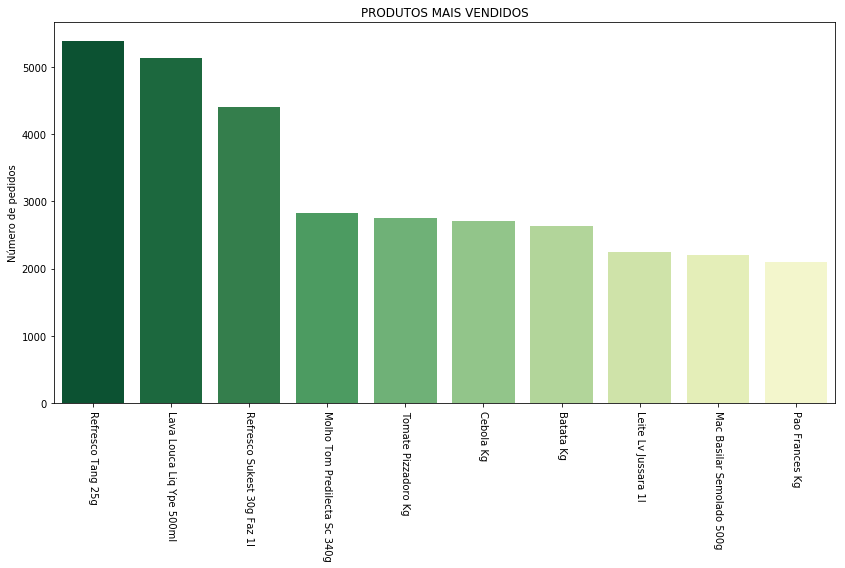

In [45]:
# plotagem do gráfico 
plt.figure(figsize=(14,7))
g=sns.barplot(x = prods , y = mais_vendidos,palette='YlGn_r')
g.set_xticklabels(prods,rotation=270)
g.set_ylabel('Número de pedidos');
g.set_title('PRODUTOS MAIS VENDIDOS');
plt.show()

In [24]:
# primeira forma de preencher a matriz com zero para os valores faltantes
descricao_por_id = grup.unstack().fillna(0)
descricao_por_id.head()

name,Abacate Kg,Abacaxi Calda Ole Rodelas 400g,Abacaxi Calda Predilecta 400g,Abacaxi Hawai Un,Abacaxi Pedaco Kg,Abacaxi Perola Un,Abacaxi Proc Kg,Abobora Cabotia Cort Kg,Abobora Cabotia Int Kg,Abobora Madura Seca Cort Kg,...,Whisky Johnnie Walker 1l,Whisky Natu Nobilis Nacional 1l,Whisky Old Eight Nacional 1l,Wrap Wick Bold Ta Pronto 300g,Xarope Groselha Asteca 500ml,Xarope Groselha Asteca 900ml,Xarope Groselha Primor 1l,Xicara Cha Duralex Astral Un,Yakissoba Frango Kg,Yakissoba Sadia 600g
customer_id,,,,,,,,,,,,,,,,,,,,,
7927,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7952,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8037,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8079,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8086,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [46]:
# segunda forma de preencher a matriz com zero para os valores faltantes
#os itens de cada compra
pred = pd.crosstab(df['customer_id'],df['name'])
pred = pd.DataFrame(pred)
pred.head(5)

name,Abacate Kg,Abacaxi Calda Ole Rodelas 400g,Abacaxi Calda Predilecta 400g,Abacaxi Hawai Un,Abacaxi Pedaco Kg,Abacaxi Perola Un,Abacaxi Proc Kg,Abobora Cabotia Cort Kg,Abobora Cabotia Int Kg,Abobora Madura Seca Cort Kg,...,Whisky Johnnie Walker 1l,Whisky Natu Nobilis Nacional 1l,Whisky Old Eight Nacional 1l,Wrap Wick Bold Ta Pronto 300g,Xarope Groselha Asteca 500ml,Xarope Groselha Asteca 900ml,Xarope Groselha Primor 1l,Xicara Cha Duralex Astral Un,Yakissoba Frango Kg,Yakissoba Sadia 600g
customer_id,,,,,,,,,,,,,,,,,,,,,
7927,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7952,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8037,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8079,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8086,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [47]:
# analisando a correlação dos produtos
correlation = pred.corr()
correlation

name,Abacate Kg,Abacaxi Calda Ole Rodelas 400g,Abacaxi Calda Predilecta 400g,Abacaxi Hawai Un,Abacaxi Pedaco Kg,Abacaxi Perola Un,Abacaxi Proc Kg,Abobora Cabotia Cort Kg,Abobora Cabotia Int Kg,Abobora Madura Seca Cort Kg,...,Whisky Johnnie Walker 1l,Whisky Natu Nobilis Nacional 1l,Whisky Old Eight Nacional 1l,Wrap Wick Bold Ta Pronto 300g,Xarope Groselha Asteca 500ml,Xarope Groselha Asteca 900ml,Xarope Groselha Primor 1l,Xicara Cha Duralex Astral Un,Yakissoba Frango Kg,Yakissoba Sadia 600g
name,,,,,,,,,,,,,,,,,,,,,
Abacate Kg,1.000000,-0.000051,0.021790,0.262331,0.008511,0.626934,-0.006911,0.251832,0.290721,0.169026,...,-0.009779,-0.006911,-0.009779,0.034495,0.004302,-0.020532,-0.006911,-0.006911,-0.006911,-0.010426
Abacaxi Calda Ole Rodelas 400g,-0.000051,1.000000,-0.003979,0.015087,-0.008952,-0.017102,-0.003144,0.038672,0.039878,0.011110,...,0.154604,-0.003144,-0.004449,-0.006298,0.041408,-0.009341,-0.003144,-0.003144,-0.003144,-0.004743
Abacaxi Calda Predilecta 400g,0.021790,-0.003979,1.000000,-0.008046,-0.003602,-0.010818,-0.001265,-0.008626,-0.009329,-0.007153,...,-0.001790,-0.001265,-0.001790,-0.002534,0.070327,-0.003759,-0.001265,-0.001265,-0.001265,-0.001909
Abacaxi Hawai Un,0.262331,0.015087,-0.008046,1.000000,0.016103,0.257414,-0.006359,0.108033,0.131497,0.052692,...,0.018629,-0.006359,-0.008997,0.026372,-0.005609,0.008406,-0.006359,0.032691,-0.006359,0.002189
Abacaxi Pedaco Kg,0.008511,-0.008952,-0.003602,0.016103,1.000000,0.061502,0.435573,0.127112,-0.003422,-0.006706,...,-0.004028,-0.002847,-0.004028,-0.005702,0.093219,-0.008458,-0.002847,-0.002847,-0.002847,-0.004295
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Xarope Groselha Asteca 900ml,-0.020532,-0.009341,-0.003759,0.008406,-0.008458,0.012657,-0.002971,0.038208,0.006134,-0.016796,...,-0.004204,-0.002971,-0.004204,-0.005951,0.071736,1.000000,-0.002971,-0.002971,-0.002971,0.153851
Xarope Groselha Primor 1l,-0.006911,-0.003144,-0.001265,-0.006359,-0.002847,-0.008550,-0.001000,-0.006818,-0.007373,-0.005654,...,-0.001415,-0.001000,-0.001415,-0.002003,-0.003796,-0.002971,1.000000,-0.001000,-0.001000,-0.001509
Xicara Cha Duralex Astral Un,-0.006911,-0.003144,-0.001265,0.032691,-0.002847,0.078559,-0.001000,-0.006818,-0.007373,-0.005654,...,-0.001415,-0.001000,-0.001415,-0.002003,-0.003796,-0.002971,-0.001000,1.000000,-0.001000,-0.001509


In [32]:
#retirando a descrição nominal das colunas(“descricao”)
descricao_por_id = pd.DataFrame(data= descricao_por_id.values, columns=descricao_por_id.columns.values.tolist(), index=descricao_por_id.index)
descricao_por_id

,Abacate Kg,Abacaxi Calda Ole Rodelas 400g,Abacaxi Calda Predilecta 400g,Abacaxi Hawai Un,Abacaxi Pedaco Kg,Abacaxi Perola Un,Abacaxi Proc Kg,Abobora Cabotia Cort Kg,Abobora Cabotia Int Kg,Abobora Madura Seca Cort Kg,...,Whisky Johnnie Walker 1l,Whisky Natu Nobilis Nacional 1l,Whisky Old Eight Nacional 1l,Wrap Wick Bold Ta Pronto 300g,Xarope Groselha Asteca 500ml,Xarope Groselha Asteca 900ml,Xarope Groselha Primor 1l,Xicara Cha Duralex Astral Un,Yakissoba Frango Kg,Yakissoba Sadia 600g
customer_id,,,,,,,,,,,,,,,,,,,,,
7927,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7952,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8037,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8079,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8086,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61625,2.0,0.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
61631,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
61640,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [33]:
# analisando a correlação dos produtos
correlation = descricao_por_id.corr()
correlation

,Abacate Kg,Abacaxi Calda Ole Rodelas 400g,Abacaxi Calda Predilecta 400g,Abacaxi Hawai Un,Abacaxi Pedaco Kg,Abacaxi Perola Un,Abacaxi Proc Kg,Abobora Cabotia Cort Kg,Abobora Cabotia Int Kg,Abobora Madura Seca Cort Kg,...,Whisky Johnnie Walker 1l,Whisky Natu Nobilis Nacional 1l,Whisky Old Eight Nacional 1l,Wrap Wick Bold Ta Pronto 300g,Xarope Groselha Asteca 500ml,Xarope Groselha Asteca 900ml,Xarope Groselha Primor 1l,Xicara Cha Duralex Astral Un,Yakissoba Frango Kg,Yakissoba Sadia 600g
Abacate Kg,1.000000,-0.000051,0.021790,0.262331,0.008511,0.626934,-0.006911,0.251832,0.290721,0.169026,...,-0.009779,-0.006911,-0.009779,0.034495,0.004302,-0.020532,-0.006911,-0.006911,-0.006911,-0.010426
Abacaxi Calda Ole Rodelas 400g,-0.000051,1.000000,-0.003979,0.015087,-0.008952,-0.017102,-0.003144,0.038672,0.039878,0.011110,...,0.154604,-0.003144,-0.004449,-0.006298,0.041408,-0.009341,-0.003144,-0.003144,-0.003144,-0.004743
Abacaxi Calda Predilecta 400g,0.021790,-0.003979,1.000000,-0.008046,-0.003602,-0.010818,-0.001265,-0.008626,-0.009329,-0.007153,...,-0.001790,-0.001265,-0.001790,-0.002534,0.070327,-0.003759,-0.001265,-0.001265,-0.001265,-0.001909
Abacaxi Hawai Un,0.262331,0.015087,-0.008046,1.000000,0.016103,0.257414,-0.006359,0.108033,0.131497,0.052692,...,0.018629,-0.006359,-0.008997,0.026372,-0.005609,0.008406,-0.006359,0.032691,-0.006359,0.002189
Abacaxi Pedaco Kg,0.008511,-0.008952,-0.003602,0.016103,1.000000,0.061502,0.435573,0.127112,-0.003422,-0.006706,...,-0.004028,-0.002847,-0.004028,-0.005702,0.093219,-0.008458,-0.002847,-0.002847,-0.002847,-0.004295
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Xarope Groselha Asteca 900ml,-0.020532,-0.009341,-0.003759,0.008406,-0.008458,0.012657,-0.002971,0.038208,0.006134,-0.016796,...,-0.004204,-0.002971,-0.004204,-0.005951,0.071736,1.000000,-0.002971,-0.002971,-0.002971,0.153851
Xarope Groselha Primor 1l,-0.006911,-0.003144,-0.001265,-0.006359,-0.002847,-0.008550,-0.001000,-0.006818,-0.007373,-0.005654,...,-0.001415,-0.001000,-0.001415,-0.002003,-0.003796,-0.002971,1.000000,-0.001000,-0.001000,-0.001509
Xicara Cha Duralex Astral Un,-0.006911,-0.003144,-0.001265,0.032691,-0.002847,0.078559,-0.001000,-0.006818,-0.007373,-0.005654,...,-0.001415,-0.001000,-0.001415,-0.002003,-0.003796,-0.002971,-0.001000,1.000000,-0.001000,-0.001509
Yakissoba Frango Kg,-0.006911,-0.003144,-0.001265,-0.006359,-0.002847,0.013227,-0.001000,-0.006818,-0.007373,-0.005654,...,-0.001415,-0.001000,-0.001415,0.499249,-0.003796,-0.002971,-0.001000,-0.001000,1.000000,-0.001509


In [57]:
# maiores correlações tirando as duplicatas
maiores_corrs = correlation.unstack().sort_values(ascending=False)[5579:]
maiores_corrs

name                             name                           
Ambrosia Port Res De Minas 620g  Pano U.Geral s Brite C/2           1.000000
                                 Garrafa Term Invicta Rolha 1l      1.000000
                                 Emb Band B4 Amarela                1.000000
                                 Ambrosia Port Res De Minas 620g    1.000000
Amac Ype Roupas 5l               Amac Ype Roupas 5l                 1.000000
                                                                      ...   
Lava Louca Liq Ype 500ml         Marmitex Barracao 2ª Op           -0.078972
Marmitex Barracao 10ª Op         Mac Basilar Semolado 500g         -0.080733
Mac Basilar Semolado 500g        Marmitex Barracao 10ª Op          -0.080733
Cr Leite Jussara Tp 200g         Marmitex Barracao 2ª Op           -0.085541
Marmitex Barracao 2ª Op          Cr Leite Jussara Tp 200g          -0.085541
Length: 31119662, dtype: float64

In [58]:
prod_menos = maiores_corrs.loc[maiores_corrs.values < 1.000000]
print('Produtos menos vendidos:\n', prod_menos )

Produtos menos vendidos:
 name                                name                              
Boleira Plasutil Decora Retangular  Pote Hermet Santana 865ml             1.000000
Conj Prato Nadir Diamante Fundo Un  Pote Hermet Santana 865ml             1.000000
Pote Hermet Santana 865ml           Boleira Plasutil Decora Retangular    1.000000
                                    Panceta Suina Fresca Fat Kg           1.000000
Panceta Suina Fresca Fat Kg         Pote Hermet Santana 865ml             1.000000
                                                                            ...   
Lava Louca Liq Ype 500ml            Marmitex Barracao 2ª Op              -0.078972
Marmitex Barracao 10ª Op            Mac Basilar Semolado 500g            -0.080733
Mac Basilar Semolado 500g           Marmitex Barracao 10ª Op             -0.080733
Cr Leite Jussara Tp 200g            Marmitex Barracao 2ª Op              -0.085541
Marmitex Barracao 2ª Op             Cr Leite Jussara Tp 200g             

In [59]:
# Removendo dados duplicados
maiores_corrs = prod_menos.head(10).drop_duplicates()
maiores_corrs

name                                name                     
Boleira Plasutil Decora Retangular  Pote Hermet Santana 865ml    1.0
Cerv Antarc Sub Zero Pilsen 1l      Pepperoni Hans Mini Kg *     1.0
dtype: float64

# Probabilidade

-OBS : Teorema de Bayes → P( A | B ) = P( A ^ B ) / P( B )

In [70]:
# quantidade de linhas do dataset 'descricao_pelo_id'
n_rows = df.order_id.shape[0]
n_rows

359914

In [76]:
#probabilidade do cliente comprar um produto
prod1 = descricao_por_id[descricao_por_id['Marmitex Barracao 2ª Op'] != 0].shape[0] / n_rows

#probabilidade do cliente comprar dois produtos 
prod2 = descricao_por_id[(descricao_por_id['Marmitex Barracao 2ª Op'] != 0)  &  \
                      (descricao_por_id['Cr Leite Jussara Tp 200g'] != 0)].shape[0] / n_rows

#probabilidade do cliente comprar um produto dado que já adquiriu outro
P1 = prod1/prod2 
print("P1: ",P1)

P1:  11.166666666666668


In [87]:
# cópia do dataframe ‘corr_descricao_por_id’
data=descricao_por_id.copy()

#cluesterização de clientes considerando os 10 produtos mais pedidos
kmeans = KMeans(n_clusters=5, init='k-means++', n_init=10, random_state=1234)
data['clusters'] = kmeans.fit_predict(data.values)

In [90]:
# agrupamento por tipo de cluster
group = data.groupby('clusters').aggregate('sum')

# selecionando apenas os produtos mais vendidos
group = group[mais_vendidos.index.tolist()]
group

,Refresco Tang 25g,Lava Louca Liq Ype 500ml,Refresco Sukest 30g Faz 1l,Molho Tom Predilecta Sc 340g,Tomate Pizzadoro Kg,Cebola Kg,Batata Kg,Leite Lv Jussara 1l,Mac Basilar Semolado 500g,Pao Frances Kg
clusters,,,,,,,,,,
0,1777.0,2453.0,695.0,1173.0,1189.0,1146.0,1131.0,942.0,978.0,845.0
1,1125.0,1224.0,971.0,852.0,866.0,845.0,781.0,577.0,584.0,627.0
2,2017.0,780.0,238.0,326.0,330.0,352.0,360.0,318.0,263.0,350.0
3,0.0,82.0,0.0,9.0,95.0,88.0,96.0,178.0,35.0,68.0
4,473.0,590.0,2506.0,462.0,265.0,280.0,271.0,233.0,335.0,201.0


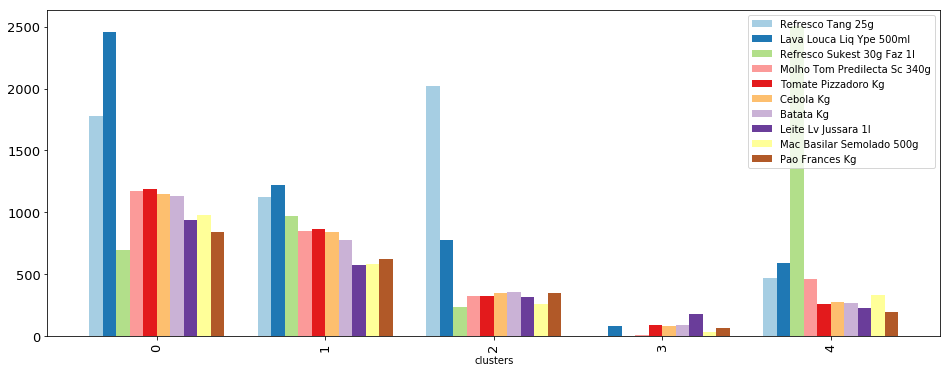

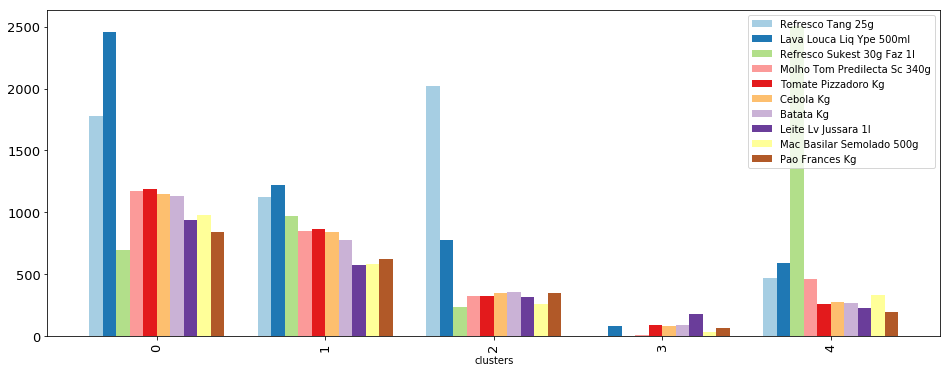

In [92]:
#plotagem do gráfico
group.plot.bar(figsize=(16,6), colormap='Paired', width=0.8 , fontsize=13)
plt.show()